## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-09-16 09:37:34.223674: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-16 09:37:34.285877: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-16 09:37:34.467992: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-16 09:37:34.469138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instruc

In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run
from sim.wandb_scrape import *

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 4.2%
RAM Usage: 4.1%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


## Wandb API Query <a id="sims"></a>

Search and plot Random

In [10]:
from collections import defaultdict

# Define model groups and their valid feature types
models = ['xgboost', 'bilinear_lowrank', 'dynamic_mlp',
          #'shared_transformer', 'shared_transformer_cls', 
          'shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls', 
          'shared_transformer_conv', 'shared_transformer_ae']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'xgboost': ['transcriptome'],
    'bilinear_lowrank': ['transcriptome'],
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome'],
    'shared_transformer_pool': ['transcriptome'],
    'shared_transformer_cls_pool': ['transcriptome'],
    'shared_transformer_pca': ['transcriptome'],
    'shared_transformer_pls': ['transcriptome'],
    'shared_transformer_conv': ['transcriptome'],
    'shared_transformer_ae': ['transcriptome']
}

cv_type = 'random'
null_model = 'none'
within_last = 90
before_last = -1

# Store summary DataFrames
summary_dict_random = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random, within_last=within_last, before_last=before_last)

# cv_type = 'random'
# null_model = 'spin'

# # Store summary DataFrames
# summary_dict_random_spin = {}
# process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random_spin, within_last=within_last, before_last=before_last)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=xgboost, cv_type=random, null_model=none, feature_type=transcriptome
✓ xgboost with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_lowrank, cv_type=random, null_model=none, feature_type=transcriptome
✓ bilinear_lowrank with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=random, null_model=none, feature_type=transcriptome
✓ dynamic_mlp: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=random, null_model=none, feature_type=transcriptome+euclidean
✓ dynamic_mlp_coords: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=random, null_model=none, feature_type=transcriptome
✓ shared_transformer_pool with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_cls_pool, cv_type=random, null_model=none, feature_type=tran

In [11]:
summary_dict_random

{'xgboost':         train_geodesic_distance  train_inter_hemi_r  \
 mean                  24.973210            0.883546   
 std                    2.294384            0.036459   
 stderr                 0.362774            0.005765   
 
         train_inter_network_Cerebellum_r  train_inter_network_Cont_r  \
 mean                            0.888657                    0.902066   
 std                             0.034657                    0.030191   
 stderr                          0.005480                    0.004774   
 
         train_inter_network_Default_r  train_inter_network_DorsAttn_r  \
 mean                         0.885756                        0.921692   
 std                          0.036843                        0.024211   
 stderr                       0.005825                        0.003828   
 
         train_inter_network_Limbic_r  train_inter_network_SalVentAttn_r  \
 mean                        0.910122                           0.906491   
 std               

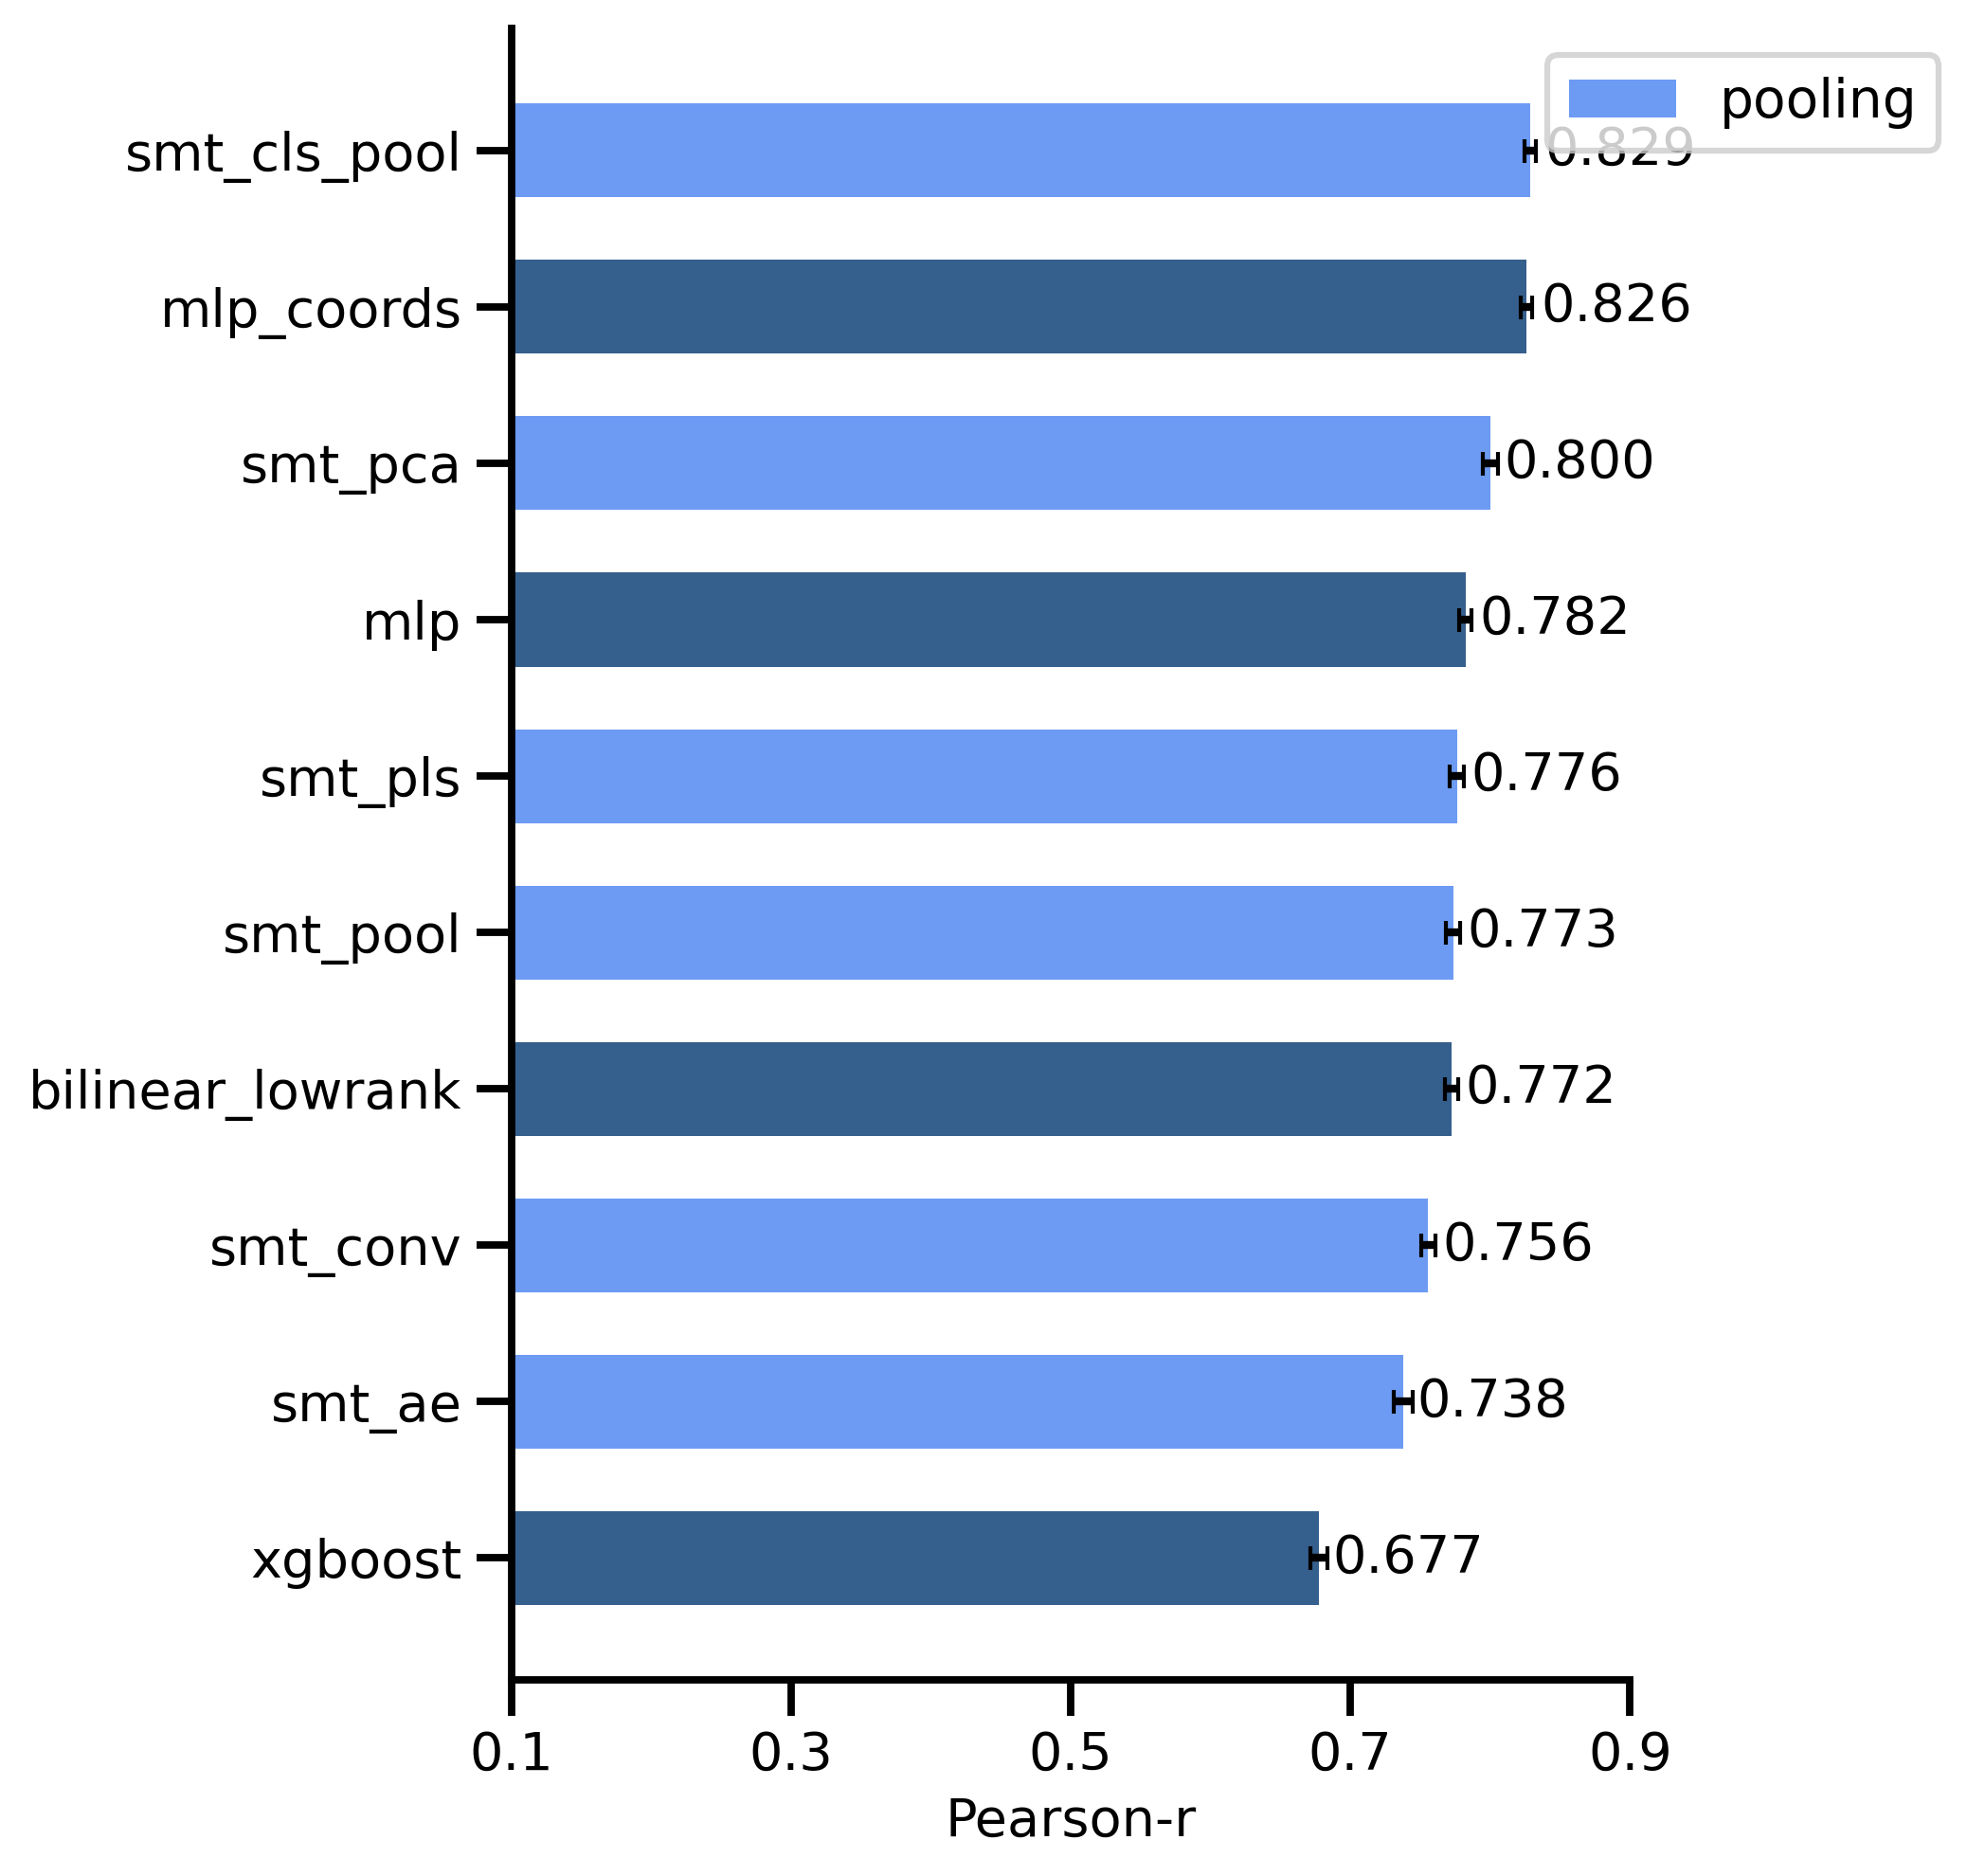

In [12]:
highlight_models = ['shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls',  'shared_transformer_ae', 'shared_transformer_conv']

plot_model_barchart(summary_dict_random, metric="test_pearson_r", xlim=(0.1, 0.9), highlight_models=highlight_models, highlight_label='pooling')

Search and plot spatial

In [16]:
from collections import defaultdict

# Define model groups and their valid feature types
models = ['xgboost', 'dynamic_mlp', 'bilinear_lowrank',
          #'shared_transformer', 'shared_transformer_cls', 
          'shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls', 
          'shared_transformer_conv', 'shared_transformer_ae']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'xgboost': ['transcriptome'],
    'bilinear_lowrank': ['transcriptome'],
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome'],
    'shared_transformer_pool': ['transcriptome'],
    'shared_transformer_cls_pool': ['transcriptome'],
    'shared_transformer_pca': ['transcriptome'],
    'shared_transformer_pls': ['transcriptome'],
    'shared_transformer_conv': ['transcriptome'],
    'shared_transformer_ae': ['transcriptome']
}
cv_type = 'spatial'
null_model = 'none'
within_last = 90
before_last = -1

# Store summary DataFrames
summary_dict_spatial = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_spatial, within_last=within_last, before_last=before_last)

# cv_type = 'random'
# null_model = 'spin'

# # Store summary DataFrames
# summary_dict_random_spin = {}
# process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random_spin, within_last=within_last, before_last=before_last)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=xgboost, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ xgboost with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ dynamic_mlp: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=spatial, null_model=none, feature_type=transcriptome+euclidean
✓ dynamic_mlp_coords: Successfully found 40 runs
🔍 Fetching runs for: model=bilinear_lowrank, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ bilinear_lowrank with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ shared_transformer_pool with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_cls_pool, cv_type=spatial, null_model=none, feature_typ

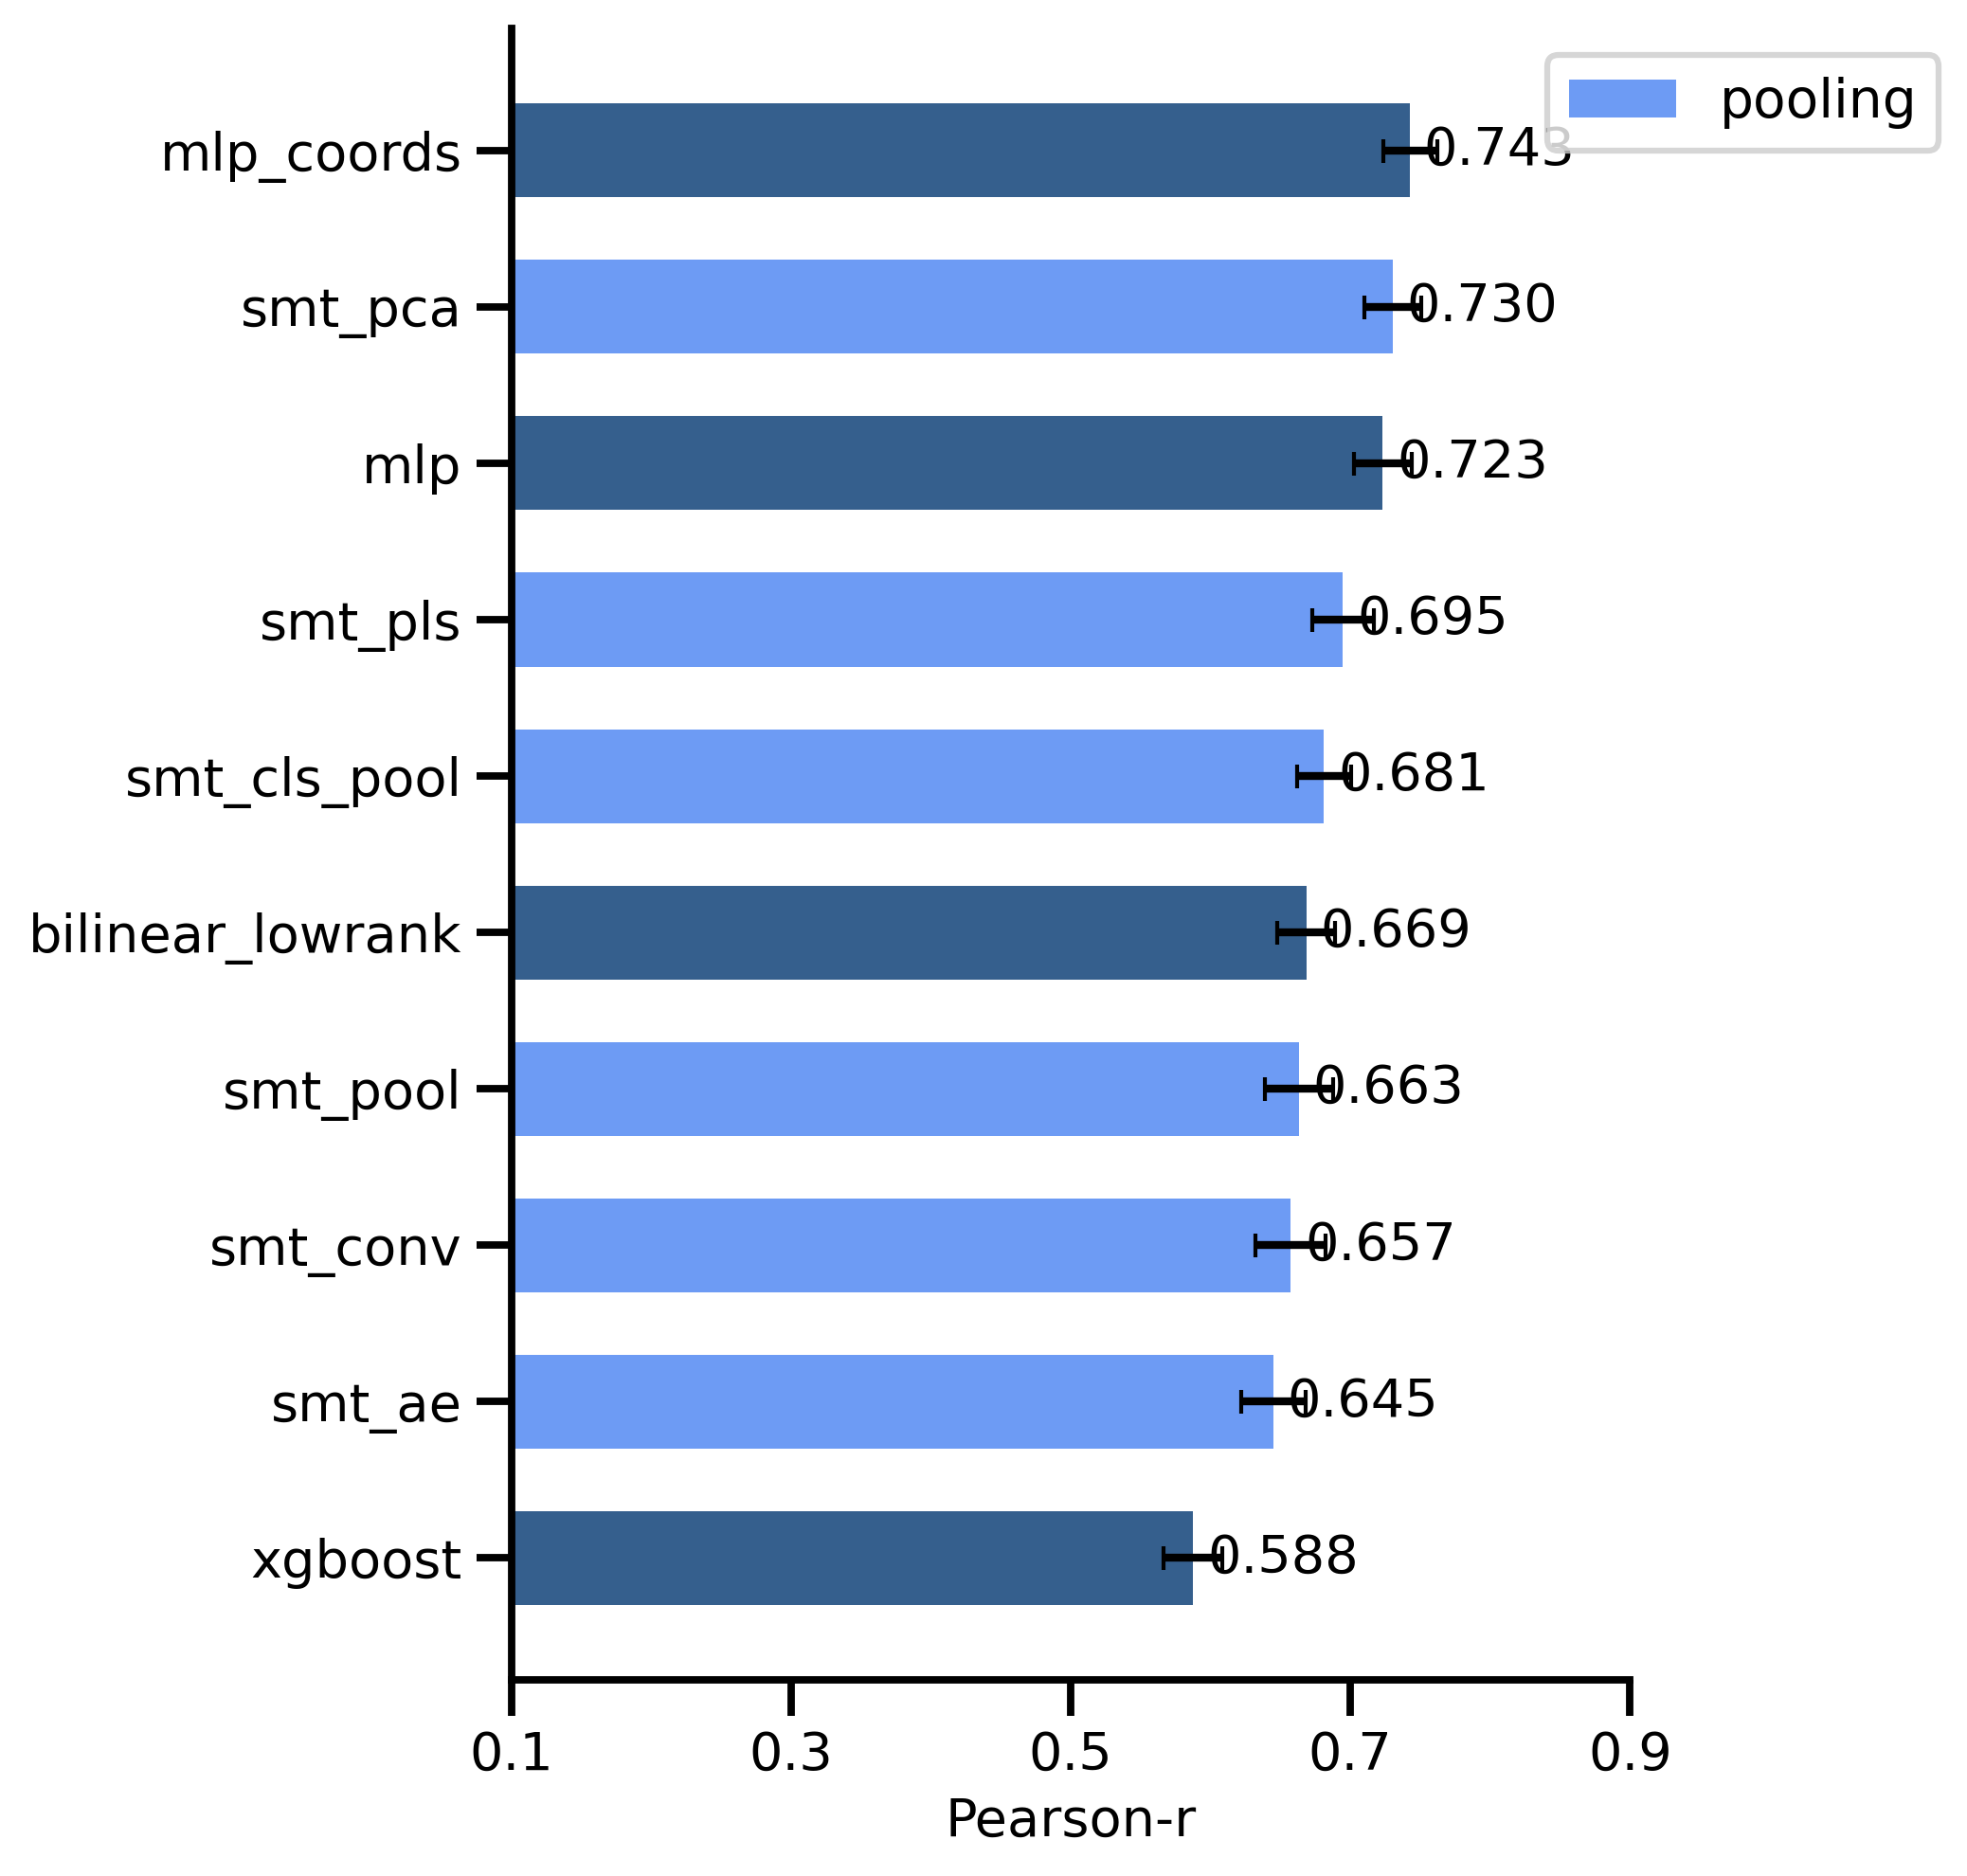

In [17]:
highlight_models = ['shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls',  'shared_transformer_ae', 'shared_transformer_conv']

plot_model_barchart(summary_dict_spatial, metric="test_pearson_r", xlim=(0.1, 0.9), highlight_models=highlight_models, highlight_label='pooling')